In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

# Import data

In [2]:
df_raw = pd.read_csv("./Data/PhiladelphiaLandTemperatures.csv")
df_raw

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.072,1.740,Philadelphia,United States,39.38N,74.91W
1,1743-12-01,NaN,NaN,Philadelphia,United States,39.38N,74.91W
2,1744-01-01,NaN,NaN,Philadelphia,United States,39.38N,74.91W
3,1744-02-01,NaN,NaN,Philadelphia,United States,39.38N,74.91W
4,1744-03-01,NaN,NaN,Philadelphia,United States,39.38N,74.91W
...,...,...,...,...,...,...,...
3234,2013-05-01,16.638,0.184,Philadelphia,United States,39.38N,74.91W
3235,2013-06-01,22.213,0.236,Philadelphia,United States,39.38N,74.91W
3236,2013-07-01,25.683,0.233,Philadelphia,United States,39.38N,74.91W
3237,2013-08-01,22.477,0.381,Philadelphia,United States,39.38N,74.91W


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   dt                             3239 non-null   object 
 1   AverageTemperature             3119 non-null   float64
 2   AverageTemperatureUncertainty  3119 non-null   float64
 3   City                           3239 non-null   object 
 4   Country                        3239 non-null   object 
 5   Latitude                       3239 non-null   object 
 6   Longitude                      3239 non-null   object 
dtypes: float64(2), object(5)
memory usage: 177.3+ KB


## `load_data()`

In [3]:
def load_data(filepath):
    df = (pd.read_csv(filepath)
          .dropna() # Remove rows with missing values
          .iloc[1:, :] # First row has a temp. but skips the sequence; that far back not useful
          .reset_index(drop=True)
          .rename(columns={"dt": "date", 
                           "AverageTemperature": "avg_temp", 
                           "AverageTemperatureUncertainty": "avg_temp_uncertainty", # May be interesting to plot avg. temp +/- uncertainty
                           }
          )
    )
    
    df['date'] = pd.to_datetime(df['date'])

    cols_sel = ['date', 'avg_temp', 'avg_temp_uncertainty']
    
    return df.loc[:, cols_sel]

In [4]:
df = load_data("./Data/PhiladelphiaLandTemperatures.csv")
df

,date,avg_temp,avg_temp_uncertainty
0,1744-04-01,11.672,2.088
1,1744-05-01,16.907,1.586
2,1744-06-01,22.366,1.531
3,1744-07-01,23.642,1.371
4,1744-09-01,17.153,1.533
...,...,...,...
3113,2013-05-01,16.638,0.184
3114,2013-06-01,22.213,0.236
3115,2013-07-01,25.683,0.233
3116,2013-08-01,22.477,0.381


## `get_slice()`

In [5]:
def get_slice(df_inp, start_date, end_date):

    slice = df_inp[(df_inp["date"] >= start_date) & (df["date"] <= end_date)]

    return slice

In [6]:
df_slice = get_slice(df, "1980-01-01", "1982-12-31")
df_slice

,date,avg_temp,avg_temp_uncertainty
2713,1980-01-01,0.759,0.337
2714,1980-02-01,-0.678,0.442
2715,1980-03-01,4.608,0.337
2716,1980-04-01,11.776,0.287
2717,1980-05-01,17.719,0.323
2718,1980-06-01,20.301,0.214
2719,1980-07-01,24.782,0.463
2720,1980-08-01,24.976,0.347
2721,1980-09-01,21.434,0.321
2722,1980-10-01,12.609,0.237


## `train_test_split()`

In [7]:
def train_test_split(df_slice_inp, train_size):
    train = (df_slice_inp.iloc[:train_size, :]["avg_temp"]
             .to_numpy()
             .reshape(-1, 1)
             )
    test = (df_slice_inp.iloc[train_size:, :]["avg_temp"]
            .to_numpy()
            .reshape(-1, 1)
    )

    return train, test

In [8]:
X, y = train_test_split(df_slice, 24)
X.shape, y.shape

((24, 1), (12, 1))

In [9]:
X

array([[ 0.759],
       [-0.678],
       [ 4.608],
       [11.776],
       [17.719],
       [20.301],
       [24.782],
       [24.976],
       [21.434],
       [12.609],
       [ 6.665],
       [ 1.106],
       [-2.854],
       [ 3.606],
       [ 4.779],
       [12.519],
       [16.228],
       [22.059],
       [24.541],
       [22.446],
       [19.227],
       [11.901],
       [ 7.762],
       [ 1.743]])

# Train RNN - Tanh

## `make_RNN()`

In [10]:
def make_RNN(X_inp, fcl_size, output_size, act_func="tanh"):

    from Layers.InputLayer import InputLayer
    from Layers.FullyConnectedLayer import FullyConnectedLayer
    from Layers.TanhLayer import TanhLayer
    from Layers.ReLULayer import ReLULayer
    from Layers.LinearLayer import LinearLayer
    from LossFunctions.SquaredError import SquaredError

    IL = InputLayer(X_inp)
    FCLU = FullyConnectedLayer(X_inp.shape[1], fcl_size, random=False, randstate=0)
    if act_func == "relu":
        ACT1 = ReLULayer()
    else:
        ACT1 = TanhLayer()

    FCLW = FullyConnectedLayer(fcl_size, fcl_size, random=False, randstate=1)
    FCLV = FullyConnectedLayer(fcl_size, output_size, random=False, randstate=2)
    ACT2 = LinearLayer()
    SE = SquaredError()

    model = {"IL": IL, "FCLU": FCLU, "ACT1": ACT1, "FCLW": FCLW, "FCLV": FCLV, "ACT2": ACT2, "SE": SE}

    return model

In [11]:
rnn = make_RNN(X_inp = X, fcl_size=10, output_size=y.shape[0])

print(f"Check weights consistent:")
for fcl in ["FCLU", "FCLW", "FCLV"]:
    print(f"{fcl}", rnn[fcl].getWeights()[:3, :3],)
    print()

Check weights consistent:
FCLU [[9.76270079e-06 4.30378733e-05 2.05526752e-05]]

FCLW [[-1.65955991e-05  4.40648987e-05 -9.99771250e-05]
 [-1.61610971e-05  3.70439001e-05 -5.91095501e-05]
 [ 6.01489137e-05  9.36523151e-05 -3.73151644e-05]]

FCLV [[-1.28010196e-05 -9.48147536e-05  9.93249558e-06]
 [-7.30840109e-05  2.71562425e-06 -6.31120269e-05]
 [-7.45680057e-05  1.93490618e-05 -5.47975999e-05]]



## `train_RNN_inplace_def()` - for loop

In [132]:
def train_RNN_inplace_for(model, X, y, learning_rate, epochs):

    training_dict = {"epoch": list(range(epochs)),
                     "squared_error": [],
                     "y_preds": [],}

    for epoch in range(epochs):
        # Forward
        for t in range(len(X)):
            IL_out = model["IL"].forward(X[t])
            if t > 0:
                FCLU_out = model["FCLU"].forward_with_feedback(IL_out, model["FCLW"].getPrevOut()[t-1])
            else:
                FCLU_out = model["FCLU"].forward(IL_out)
            ACT1_out = model["ACT1"].forward(FCLU_out)
            FCLW_out = model["FCLW"].forward(ACT1_out)
            FCLV_out = model["FCLV"].forward(ACT1_out)
            ACT2_out = model["ACT2"].forward(FCLV_out)

        # Predictions and Loss
        # training_dict["y_preds"].append(ACT2_out.reshape(y.shape))
        training_dict["y_preds"].append(ACT2_out)

        error = model["SE"].eval(y, ACT2_out.reshape(y.shape))
        training_dict["squared_error"].append(error)

        # Backward
        dhNext_dW = np.zeros((1, model["FCLV"].getWeights().shape[0])) # Same shape as what FCLV.backward(grad) is...
        
        for t in range(len(X)-1, -1, -1):
            grad = model["SE"].gradient(y, model["ACT2"].getPrevOut()[-1].reshape(y.shape)).reshape(1, -1)
            grad = model["ACT2"].backward(grad, t_inp=t)

            model["FCLV"].updateWeightsGradAccum(grad, t_inp=t)
            model["FCLV"].updateBiasesGradAccum(grad)

            grad = model["FCLV"].backward(grad) + dhNext_dW
            # if t == len(X)-1:
                # print(f"FCLV gradient shape is: {grad.shape}") # Verify gradient shape
            grad = model["ACT1"].backward(grad, t_inp=t)

            if t > 0:
                model["FCLW"].updateWeightsGradAccum(grad, t_inp=t-1) # Have to use t-1
                model["FCLW"].updateBiasesGradAccum(grad)

            model["FCLU"].updateWeightsGradAccum(grad, t_inp=t)
            model["FCLU"].updateBiasesGradAccum(grad)

            dhNext_dW = model["FCLW"].backward(grad)

        # Update weights   
        model["FCLU"].updateWeights(grad, eta=learning_rate)
        model["FCLV"].updateWeights(grad, eta=learning_rate)
        model["FCLW"].updateWeights(grad, eta=learning_rate)

    return pd.DataFrame(training_dict)

## Train model (1980-1981 --> 1982)

In [13]:
lr = 0.0001
rnn_tanh_1980 = make_RNN(X_inp = X, fcl_size=20, output_size=y.shape[0]) # Have to reinitialize
training_results_tanh_1980 = train_RNN_inplace_for(rnn_tanh_1980, X, y, learning_rate=lr, epochs=60)
training_results_tanh_1980

,epoch,squared_error,y_preds
0,0,214.108051,"[[-6.914497296173626e-05, 4.801153657132353e-0..."
1,1,212.057547,"[[-0.015649611599405353, 0.009566182422564259,..."
2,2,207.995860,"[[-0.04673575783435488, 0.028556837458229543, ..."
3,3,202.000882,"[[-0.09317836966338991, 0.05692882307233775, 0..."
4,4,194.187577,"[[-0.15475452430346073, 0.09454595755361904, 0..."
5,5,184.705780,"[[-0.2311686630205322, 0.14122768633141103, 0...."
6,6,173.737319,"[[-0.3220540131455767, 0.19674995055096997, 0...."
7,7,161.492534,"[[-0.42697435216198404, 0.26084626459286975, 0..."
8,8,148.206238,"[[-0.5454261050530824, 0.3332089971576059, 0.9..."
9,9,134.133216,"[[-0.6768407644759042, 0.4134908495458882, 1.1..."


## Plot errors
* NOTE: Epoch with 0 error will be overfit - stop earlier than that

<AxesSubplot: xlabel='epoch'>

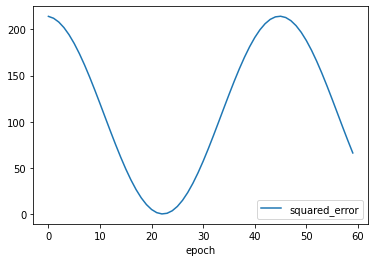

In [14]:
training_results_tanh_1980.plot(x="epoch", y="squared_error")

## Plot Predictions
* TODO: Make a function for plotting, give a gradient of colors from Red to Purple


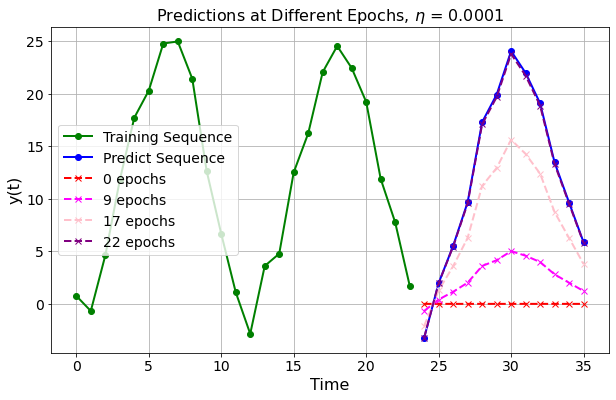

In [22]:
graph_index_lst = [0, 9, 17, 22]
colors = ["red", "magenta", "purple"]
y_preds_graph = training_results_tanh_1980["y_preds"].loc[graph_index_lst].to_numpy()

fig, ax = plt.subplots(figsize=(10, 6))
t_vals_x = np.arange(len(X))
t_vals_y = np.arange(len(X), len(X)+len(y))

ax.plot(t_vals_x, X.flatten(), color="green", linestyle="solid", label="Training Sequence", linewidth=2, marker="o")
ax.plot(t_vals_y, y.flatten(), color="blue", linestyle="solid", label="Predict Sequence", linewidth=2, marker="o")

colors = ["red", "magenta", "pink", "purple"]
for ind, y_pred_seq, color in zip(graph_index_lst, y_preds_graph, colors):
    ax.plot(t_vals_y, y_pred_seq.flatten(), color = color, linestyle="dashed", label=f"{ind} epochs", linewidth=2, marker="x")


ax.set_xlabel("Time", fontsize=16)
ax.set_ylabel("y(t)", fontsize=16)
ax.set_title(f"Predictions at Different Epochs, $\eta$ = {lr}", 
             fontsize=16)
ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)
ax.legend(fontsize=14)
ax.grid()
plt.show()

# Validation Set (Tanh RNN) (1983-1984 --> 1985)

## Train to right number of epochs

### `train_RNN_inplace()` - while loop

In [79]:
def train_RNN_inplace(model, X, y, learning_rate):

    training_dict = {"epoch": [],
                     "squared_error": [],
                     "y_preds": [],}
    epochs = 0
    rmse = 100
    while rmse > 1:
        # Forward
        for t in range(len(X)):
            IL_out = model["IL"].forward(X[t])
            if t > 0:
                FCLU_out = model["FCLU"].forward_with_feedback(IL_out, model["FCLW"].getPrevOut()[t-1])
            else:
                FCLU_out = model["FCLU"].forward(IL_out)
            ACT1_out = model["ACT1"].forward(FCLU_out)
            FCLW_out = model["FCLW"].forward(ACT1_out)
            FCLV_out = model["FCLV"].forward(ACT1_out)
            ACT2_out = model["ACT2"].forward(FCLV_out)

        # Predictions and Loss
        # training_dict["y_preds"].append(ACT2_out.reshape(y.shape))
        training_dict["y_preds"].append(ACT2_out)

        training_dict["epoch"].append(epochs)
        error = model["SE"].eval(y, ACT2_out.reshape(y.shape))
        training_dict["squared_error"].append(error)

        # Backward
        dhNext_dW = np.zeros((1, model["FCLV"].getWeights().shape[0])) # Same shape as what FCLV.backward(grad) is...
        
        for t in range(len(X)-1, -1, -1):
            grad = model["SE"].gradient(y, model["ACT2"].getPrevOut()[-1].reshape(y.shape)).reshape(1, -1)
            grad = model["ACT2"].backward(grad, t_inp=t)

            model["FCLV"].updateWeightsGradAccum(grad, t_inp=t)
            model["FCLV"].updateBiasesGradAccum(grad)

            grad = model["FCLV"].backward(grad) + dhNext_dW
            # if t == len(X)-1:
                # print(f"FCLV gradient shape is: {grad.shape}") # Verify gradient shape
            grad = model["ACT1"].backward(grad, t_inp=t)

            if t > 0:
                model["FCLW"].updateWeightsGradAccum(grad, t_inp=t-1) # Have to use t-1
                model["FCLW"].updateBiasesGradAccum(grad)

            model["FCLU"].updateWeightsGradAccum(grad, t_inp=t)
            model["FCLU"].updateBiasesGradAccum(grad)

            dhNext_dW = model["FCLW"].backward(grad)

        # Update weights   
        model["FCLU"].updateWeights(grad, eta=learning_rate)
        model["FCLV"].updateWeights(grad, eta=learning_rate)
        model["FCLW"].updateWeights(grad, eta=learning_rate)

        epochs +=1
        rmse = np.sqrt(error)

    return pd.DataFrame(training_dict)

In [80]:
lr = 0.0001
# num_epochs = 22
rnn_tanh_1980_opt = make_RNN(X_inp = X, fcl_size=20, output_size=y.shape[0]) # Have to reinitialize

print(f"Check weights consistent:")
for fcl in ["FCLU", "FCLW", "FCLV"]:
    print(f"{fcl}", rnn_tanh_1980_22e[fcl].getWeights()[:3, :3],)
    print()

Check weights consistent:
FCLU [[9.76270079e-06 4.30378733e-05 2.05526752e-05]]

FCLW [[-1.65955991e-05  4.40648987e-05 -9.99771250e-05]
 [ 6.01489137e-05  9.36523151e-05 -3.73151644e-05]
 [ 9.77722178e-05  4.96331309e-05 -4.39112016e-05]]

FCLV [[-1.28010196e-05 -9.48147536e-05  9.93249558e-06]
 [-7.30840109e-05  2.71562425e-06 -6.31120269e-05]
 [-7.45680057e-05  1.93490618e-05 -5.47975999e-05]]



In [81]:
training_results_tanh_1980_opt = train_RNN_inplace(rnn_tanh_1980_opt, X, y, learning_rate=lr)

In [82]:
pd.DataFrame(training_results_tanh_1980_opt)

,epoch,squared_error,y_preds
0,0,214.108052,"[[-6.91552808278778e-05, 4.8000320927469374e-0..."
1,1,212.057547,"[[-0.015649624445333025, 0.00956616899291814, ..."
2,2,207.995860,"[[-0.046735775784910796, 0.028556819273408068,..."
3,3,202.000882,"[[-0.09317839578513758, 0.05692879722182846, 0..."
4,4,194.187577,"[[-0.15475456348018962, 0.09454592126048562, 0..."
5,5,184.705778,"[[-0.2311687244408143, 0.14122763821195114, 0...."
6,6,173.737316,"[[-0.32205411417366014, 0.19674989277361424, 0..."
7,7,161.492527,"[[-0.42697452366651656, 0.2608462059929087, 0...."
8,8,148.206224,"[[-0.5454263981108489, 0.3332089572666663, 0.9..."
9,9,134.133188,"[[-0.6768412582010549, 0.4134908633914321, 1.1..."


In [93]:
df_slice_val = get_slice(df, "1983-01-01", "1985-12-31")
df_slice_val

,date,avg_temp,avg_temp_uncertainty
2749,1983-01-01,1.543,0.379
2750,1983-02-01,1.783,0.431
2751,1983-03-01,6.958,0.186
2752,1983-04-01,10.420,0.416
2753,1983-05-01,15.631,0.194
2754,1983-06-01,21.387,0.268
2755,1983-07-01,25.098,0.297
2756,1983-08-01,24.399,0.233
2757,1983-09-01,20.439,0.166
2758,1983-10-01,13.897,0.326


### `predict()`

In [84]:
def predict(model, X_inp, y_inp):
    for t in range(len(X_inp)):
        IL_out = model["IL"].forward(X_inp[t])
        if t > 0:
            FCLU_out = model["FCLU"].forward_with_feedback(IL_out, model["FCLW"].getPrevOut()[t-1])
        else:
            FCLU_out = model["FCLU"].forward(IL_out)
        ACT1_out = model["ACT1"].forward(FCLU_out)
        FCLW_out = model["FCLW"].forward(ACT1_out)
        FCLV_out = model["FCLV"].forward(ACT1_out)
        ACT2_out = model["ACT2"].forward(FCLV_out)



    y_pred = ACT2_out
    error = model["SE"].eval(y_inp, y_pred.reshape(y_inp.shape))
    rmse = np.sqrt(error)

    return y_pred, rmse

In [85]:
y_pred_train, rmse_train = predict(rnn_tanh_1980_opt, X, y)
rmse_train

0.84427849558303

In [94]:
X_val, y_val = train_test_split(df_slice_val, 24)

y_pred_val, rmse_val = predict(rnn, X_val, y_val)
rmse_val

2.947527693525646

### `graph_val_pred_date()`

In [87]:
def graph_val_pred_date(df_slice_inp, X_inp, y_inp, y_pred_inp, RMSE_inp, year_start):
    fig, ax = plt.subplots(figsize=(12, 6))
    # t_vals_x = np.arange(len(X_inp))
    t_vals_x = df_slice_inp.iloc[:len(X_inp), :]["date"].dt.strftime('%Y-%m')
    # t_vals_y = np.arange(len(X_inp), len(X_inp)+len(y_inp))
    t_vals_y = df_slice_inp.iloc[len(X_inp):(len(X_inp)+len(y_inp)), :]["date"].dt.strftime('%Y-%m')

    ax.plot(t_vals_x, X_inp.flatten(), color="green", linestyle="solid", label="Training Sequence", linewidth=2, marker="o")
    ax.plot(t_vals_y, y_inp.flatten(), color="blue", linestyle="solid", label="Predict Sequence", linewidth=2, marker="o")


    ax.plot(t_vals_y, y_pred_inp.flatten(), color = "magenta", linestyle="dashed", label=f"Model Predictions", linewidth=2, marker="x")


    ax.set_xlabel("Time", fontsize=16)
    ax.set_ylabel("T(t)", fontsize=16)
    ax.set_title(f"Predictions for Validation Set {year_start+2} from {year_start}-{year_start+1}, RMSE={RMSE_inp:.2f}", 
                fontsize=16)
    new_xticks = (df_slice_inp["date"].dt.strftime('%Y-%m')
                  .iloc[list(range(0, len(df_slice_inp), 3))] # 3 month intervals
    )
    ax.set_xticks(new_xticks, rotation=45)
    ax.tick_params(axis="x", labelsize=14)
    ax.tick_params(axis="y", labelsize=14)
    ax.legend(fontsize=14)
    ax.grid()

    plt.xticks(rotation=45)
    plt.show()

    return fig, ax

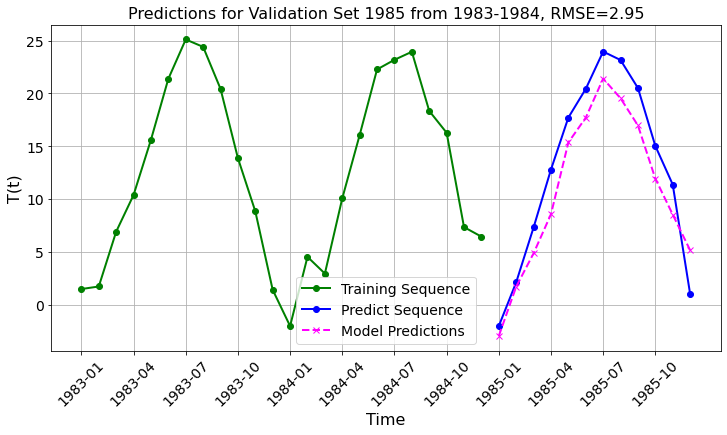

In [95]:
fig_val, ax_val = graph_val_pred_date(df_slice_val, X_val, y_val, y_pred_val, rmse_val, 1983);

## 2x2 subplot of sample

RMSE for 1983 is: 1.88
RMSE for 1988 is: 2.84
RMSE for 1998 is: 2.71
RMSE for 2008 is: 2.74


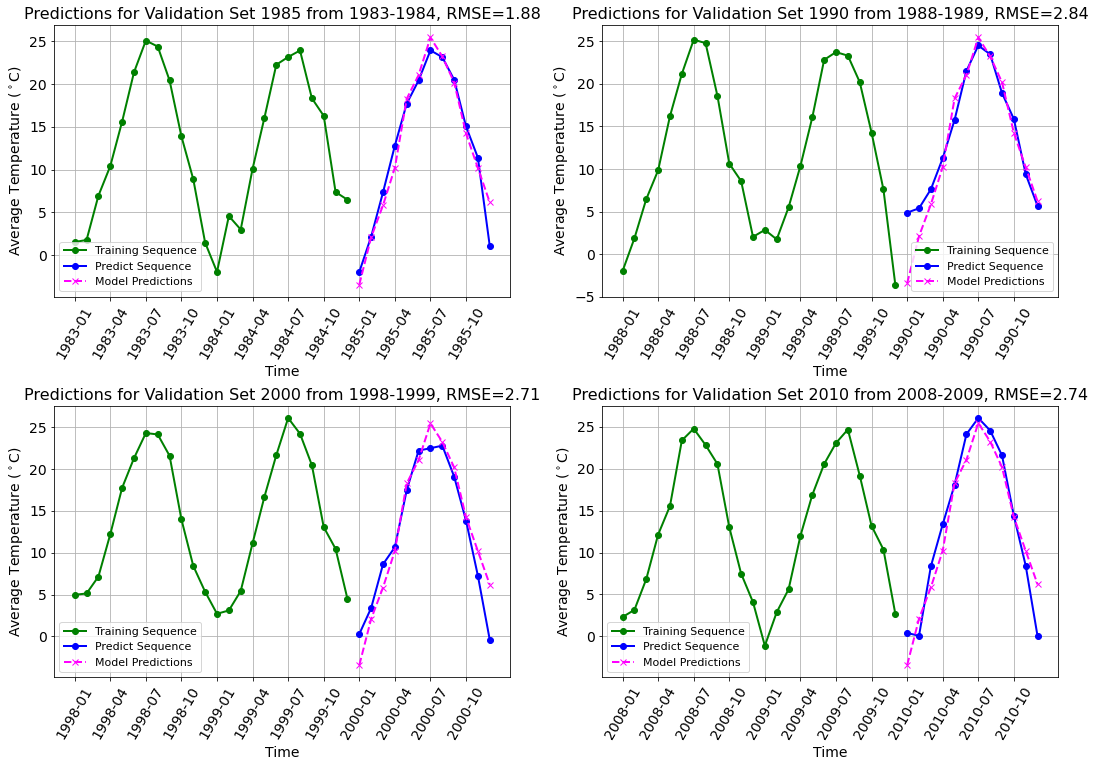

In [108]:
val_testing_dict = {"input_range": [], 
                    "predict_range": [], 
                    "rmse": []}

# fig_lst = []
# ax_lst = []

fig, axs = plt.subplots(2, 2, figsize=(18, 12), facecolor="white")
for year, ax_coord in zip([1983, 1988, 1998, 2008], [(0,0), (0,1), (1,0), (1,1)]):
    val_testing_dict["input_range"].append(f"{year} - {year+1}")
    val_testing_dict["predict_range"].append(f"{year+2}")
    
    df_slice_val = get_slice(df, f"{year}-01-01", f"{year+2}-12-31")
    # print(df_slice_val.head())x
    X_val, y_val = train_test_split(df_slice_val, 24)
    y_pred_val, rmse_val = predict(rnn_tanh_1980_opt, X_val, y_val)

    t_vals_x = df_slice_val.iloc[:len(X_val), :]["date"].dt.strftime('%Y-%m')
    # t_vals_y = np.arange(len(X_inp), len(X_inp)+len(y_inp))
    t_vals_y = df_slice_val.iloc[len(X_val):(len(X_val)+len(y_val)), :]["date"].dt.strftime('%Y-%m')

    axs[ax_coord].plot(t_vals_x, X_val.flatten(), color="green", linestyle="solid", label="Training Sequence", linewidth=2, marker="o")
    axs[ax_coord].plot(t_vals_y, y_val.flatten(), color="blue", linestyle="solid", label="Predict Sequence", linewidth=2, marker="o")


    axs[ax_coord].plot(t_vals_y, y_pred_val.flatten(), color = "magenta", linestyle="dashed", label=f"Model Predictions", linewidth=2, marker="x")


    axs[ax_coord].set_xlabel("Time", fontsize=14)
    axs[ax_coord].set_ylabel("Average Temperature ($^\circ$C)", fontsize=14)
    axs[ax_coord].set_title(f"Predictions for Validation Set {year+2} from {year}-{year+1}, RMSE={rmse_val:.2f}", 
                fontsize=16)
    new_xticks = (df_slice_val["date"].dt.strftime('%Y-%m')
                  .iloc[list(range(0, len(df_slice_val), 3))] # 3 month intervals
    )
    axs[ax_coord].set_xticks(new_xticks, labels=new_xticks.astype(str), rotation=60)
    # axs[ax_coord].set_xticks(new_xticks, rotation=45)
    # axs[ax_coord].set_xticklabels(new_xticks, rotation=45)
    axs[ax_coord].tick_params(axis="x", labelsize=14)
    axs[ax_coord].tick_params(axis="y", labelsize=14)
    axs[ax_coord].legend(fontsize=11)
    axs[ax_coord].grid()

    val_testing_dict["rmse"].append(rmse_val)

    print(f"RMSE for {year} is: {rmse_val:.2f}")
    # fig_out, ax_out = graph_val_pred_date(df_slice_val, X_val, y_val, y_pred_val, rmse_val, year)
    # fig_lst.append(fig_out)
    # ax_lst.append(ax_out)

plt.subplots_adjust(hspace=0.4)
plt.show()

## Evaluate on multiple validation sets

In [109]:
val_testing_dict = {"input_range": [], 
                    "predict_range": [], 
                    "rmse": []}

fig_lst = []
ax_lst = []

for year in range(1983, 2011):
    val_testing_dict["input_range"].append(f"{year} - {year+1}")
    val_testing_dict["predict_range"].append(f"{year+2}")
    
    df_slice_val = get_slice(df, f"{year}-01-01", f"{year+2}-12-31")
    # print(df_slice_val.head())
    X_val, y_val = train_test_split(df_slice_val, 24)
    y_pred_val, rmse_val = predict(rnn, X_val, y_val)

    val_testing_dict["rmse"].append(rmse_val)

    # print(f"RMSE for {year} is: {rmse_val:.2f}")
    # fig_out, ax_out = graph_val_pred_date(df_slice_val, X_val, y_val, y_pred_val, rmse_val, year)
    # fig_lst.append(fig_out)
    # ax_lst.append(ax_out)

In [110]:
df_val_testing = pd.DataFrame(val_testing_dict)
# df_val_testing.head()

num_epochs = training_results_tanh_1980_opt["epoch"].max()
avg_rmse = df_val_testing["rmse"].mean()
stdev_rmse = df_val_testing["rmse"].std()

print(f"Average RMSE for Tanh RNN with {num_epochs} is: {avg_rmse:.2f} +/- {stdev_rmse:.2f}")

Average RMSE for Tanh RNN with 22 is: 3.10 +/- 0.55


## Bar graph of errors

In [111]:
df_val_testing = pd.DataFrame(val_testing_dict)
df_val_testing.head()

,input_range,predict_range,rmse
0,1983 - 1984,1985,2.947528
1,1984 - 1985,1986,2.655557
2,1985 - 1986,1987,2.698968
3,1986 - 1987,1988,2.482959
4,1987 - 1988,1989,3.837243


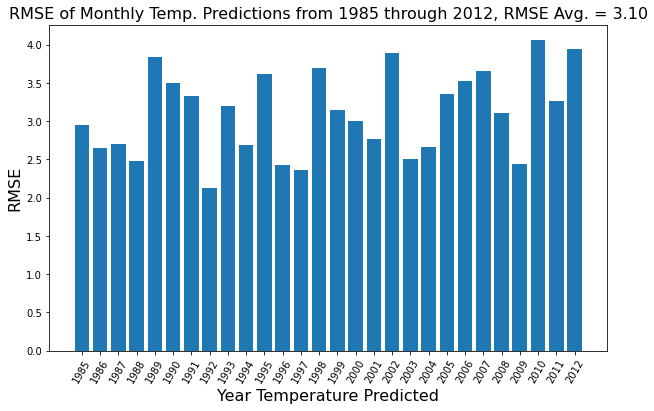

In [112]:
avg_rmse_val = df_val_testing["rmse"].mean()

plt.figure(figsize=(10, 6))  # Set the figure size to (10, 6)
plt.bar(df_val_testing["predict_range"], df_val_testing["rmse"])
plt.xlabel("Year Temperature Predicted", fontsize=16)
plt.ylabel("RMSE", fontsize=16)
avg_rmse_val_formatted = f"RMSE of Monthly Temp. Predictions from 1985 through 2012, RMSE Avg. = {avg_rmse_val:.2f}"
plt.title(avg_rmse_val_formatted, fontsize=16)
plt.xticks(rotation=60)  # Rotate x-axis labels by 45 degrees

plt.show()

## Save model to Pickle

### `save_model_pickle()`

In [121]:
def save_model_pickle(model, filename):
    import pickle

    with open(f"./Models/{filename}", "wb") as f:
        pickle.dump(model, f)

In [122]:
save_model_pickle(rnn_tanh_1980_opt, "rnn_tanh_1980_opt.pkl")

### `load_model_pickle()`

In [124]:
def load_model_pickle(filepath):
    import pickle

    with open(filepath, "rb") as f:
        model = pickle.load(f)

    return model

In [128]:
rnn_tanh_1980_opt = load_model_pickle("./Models/rnn_tanh_1980_opt.pkl")
rnn_tanh_1980_opt

{'IL': <Layers.InputLayer.InputLayer at 0x7f0b77711580>,
 'FCLU': <Layers.FullyConnectedLayer.FullyConnectedLayer at 0x7f0b79263070>,
 'ACT1': <Layers.TanhLayer.TanhLayer at 0x7f0b775cd730>,
 'FCLW': <Layers.FullyConnectedLayer.FullyConnectedLayer at 0x7f0b77d6b940>,
 'FCLV': <Layers.FullyConnectedLayer.FullyConnectedLayer at 0x7f0b77498b80>,
 'ACT2': <Layers.LinearLayer.LinearLayer at 0x7f0b775a6130>,
 'SE': <LossFunctions.SquaredError.SquaredError at 0x7f0b775a6190>}

In [129]:
rnn_tanh_1980_opt["FCLU"].getWeights()

array([[ 9.91713208e-06,  4.23084202e-05,  2.01537870e-05,
         9.19621355e-06, -1.56178658e-05,  2.92254760e-05,
        -1.24100779e-05,  7.87494680e-05,  9.32523308e-05,
        -2.29474380e-05,  5.82968696e-05,  5.87039943e-06,
         1.34598083e-05,  8.48287838e-05, -8.59996561e-05,
        -8.26608898e-05, -9.61216771e-05,  6.62786634e-05,
         5.55608815e-05,  7.35795920e-05]])

# Train RNN (tanh) - 1980-1981 --> 1982, early stopping

## 21 epochs; 20 epochs gave RMSE's in 3+ range

In [138]:
lr = 0.0001
num_epochs = 21
rnn = make_RNN(X_inp = X, fcl_size=20, output_size=y.shape[0]) # Have to reinitialize
training_results = train_RNN_inplace_for(rnn, X, y, learning_rate=lr, epochs=num_epochs)
# training_results

val_testing_dict = {"input_range": [], 
                    "predict_range": [], 
                    "rmse": []}

# fig_lst = []
# ax_lst = []

for year in range(1983, 2011):
    val_testing_dict["input_range"].append(f"{year} - {year+1}")
    val_testing_dict["predict_range"].append(f"{year+2}")
    
    df_slice_val = get_slice(df, f"{year}-01-01", f"{year+2}-12-31")
    # print(df_slice_val.head())
    X_val, y_val = train_test_split(df_slice_val, 24)
    y_pred_val, rmse_val = predict(rnn, X_val, y_val)

    val_testing_dict["rmse"].append(rmse_val)

    print(f"RMSE for {year} is: {rmse_val:.2f}")
    # fig_out, ax_out = graph_val_pred_date(df_slice_val, X_val, y_val, y_pred_val, rmse_val, year)
    # fig_lst.append(fig_out)
    # ax_lst.append(ax_out)

RMSE for 1983 is: 2.63
RMSE for 1984 is: 2.33
RMSE for 1985 is: 2.38
RMSE for 1986 is: 2.20
RMSE for 1987 is: 3.67
RMSE for 1988 is: 3.26
RMSE for 1989 is: 3.00
RMSE for 1990 is: 1.96
RMSE for 1991 is: 2.95
RMSE for 1992 is: 2.37
RMSE for 1993 is: 3.39
RMSE for 1994 is: 2.19
RMSE for 1995 is: 2.12
RMSE for 1996 is: 3.43
RMSE for 1997 is: 2.82
RMSE for 1998 is: 2.80
RMSE for 1999 is: 2.43
RMSE for 2000 is: 3.63
RMSE for 2001 is: 2.22
RMSE for 2002 is: 2.30
RMSE for 2003 is: 3.06
RMSE for 2004 is: 3.25
RMSE for 2005 is: 3.41
RMSE for 2006 is: 2.83
RMSE for 2007 is: 2.13
RMSE for 2008 is: 3.74
RMSE for 2009 is: 2.86
RMSE for 2010 is: 3.66


## Average RMSE = 2.82, stdev = 0.56

In [135]:
df_val_testing = pd.DataFrame(val_testing_dict)
avg_rmse = df_val_testing["rmse"].mean()
stdev_rmse = df_val_testing["rmse"].std()

print(f"Average RMSE for Tanh RNN with {num_epochs} epochs is: {avg_rmse:.2f} +/- {stdev_rmse:.2f}")

Average RMSE for Tanh RNN with 21 epochs is: 2.82 +/- 0.56


# Train RNN - ReLU

In [223]:
lr = 0.0001
rnn_relu = make_RNN(X_inp = X, fcl_size=22, output_size=y.shape[0], act_func="relu")
training_results_relu = train_RNN_inplace(rnn_relu, X, y, learning_rate=lr, epochs=60)
training_results_relu

,epoch,squared_error,y_preds
0,0,214.109032,"[[-1.749305971880123e-05, 9.648706065181294e-0..."
1,1,212.058518,"[[-0.015598207871188699, 0.009614421569896054,..."
2,2,207.996813,"[[-0.04668485479840906, 0.028604607931466984, ..."
3,3,202.001807,"[[-0.0931282201496077, 0.056975892306265624, 0..."
4,4,194.188467,"[[-0.15470538395736483, 0.0945920953367425, 0...."
5,5,184.706626,"[[-0.23112079395931867, 0.14127266602049668, 0..."
6,6,173.738116,"[[-0.32200768729133017, 0.19679355101104845, 0..."
7,7,161.493275,"[[-0.42692984896804914, 0.26088827168554896, 0..."
8,8,148.206917,"[[-0.5453837159139386, 0.33324920649415496, 0...."
9,9,134.133829,"[[-0.6768007937644247, 0.413529068953277, 1.15..."


# TODO:
* Test trained model on different year
* Figure out why the error vs. epochs is cyclical? Look at how the weights or gradients change overtime...
* Calculate RMSE - add that as a calculation to the training dict
* Make functions for plotting
    * Plot temp +/- uncertainty
* Put date/time on the axis instead of relative time
* Test different activation function (ReLU)